https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

In [ ]:
pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.9 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=1dbb041722e409c414e79522337873fb78dd576c3e7e008d2b5892460295e5e8
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
pip install pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.6 MB/s eta 0:00:00


In [ ]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=bbb6355153c46b9d1215a661960105bd68abea5d3fd9ba9952031cd360bb77ba
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [ ]:
pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 7.2 MB/s eta 0:00:00


In [ ]:

import pandas as pd  # Importing the pandas library for data manipulation using dataframes.
import numpy as np   # Importing the NumPy library for numerical operations and linear algebra.
from pyod.models.ecod import ECOD   # Importing the Extended Connectivity Outlier Detection (ECOD) model from PyOD library.
import lightgbm as lgb   # Importing the LightGBM library for gradient boosting framework.
import prince   # Prince library for factor analysis methods.

# Data visualization libraries
import matplotlib.pyplot as plt   # Matplotlib for creating static, animated, and interactive visualizations.
import matplotlib.cm as cm   # Colormap manipulation functions in Matplotlib.
import plotly.express as px   # Plotly Express for creating interactive visualizations.
import plotly.graph_objects as go   # Plotly Graph Objects for more customization in creating interactive visualizations.
import seaborn as sns   # Seaborn for statistical data visualization based on Matplotlib.

# Scikit-learn (sklearn) for machine learning tasks
from sklearn.cluster import KMeans   # KMeans clustering algorithm for unsupervised learning.
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder   # Data preprocessing transformers.
from sklearn.pipeline import Pipeline   # Building a composite estimator by combining transformers and an estimator.
from sklearn.manifold import TSNE   # t-distributed Stochastic Neighbor Embedding for dimensionality reduction.
from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score, classification_report   # Evaluation metrics.

# Yellowbrick library for visualizing machine learning model performance, particularly for clustering tasks.
from yellowbrick.cluster import KElbowVisualizer   # Visualizing the optimal number of clusters using the elbow method.


In [ ]:
df = pd.read_csv("/content/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
def understand_variables(dataset):

    print("Shape = "+str(dataset.shape)+"\n")
    print("Null count :\n\n"+str(dataset.isnull().sum()))

understand_variables(df)

Shape = (918, 12)

Null count :

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


# EDA

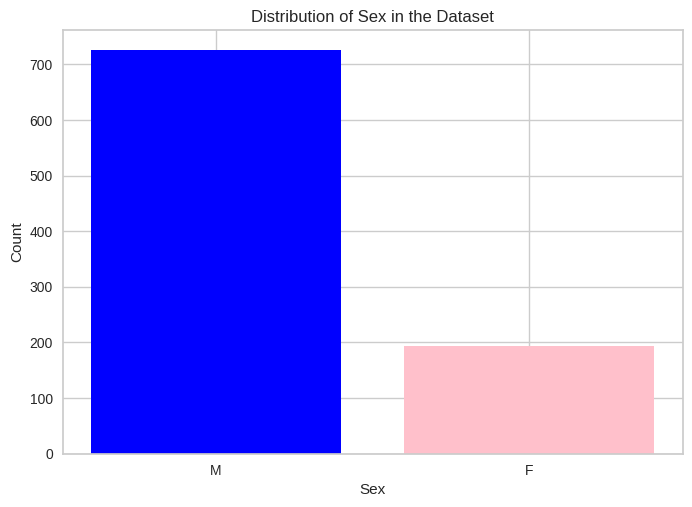

In [ ]:
# Count the occurrences of each sex
sex_counts = df['Sex'].value_counts()
colors = ['blue', 'pink']
# Create a bar chart
plt.bar(sex_counts.index, sex_counts.values, color=colors)

# Set the chart title and labels
plt.title('Distribution of Sex in the Dataset')
plt.xlabel('Sex')
plt.ylabel('Count')

# Display the chart
plt.show()

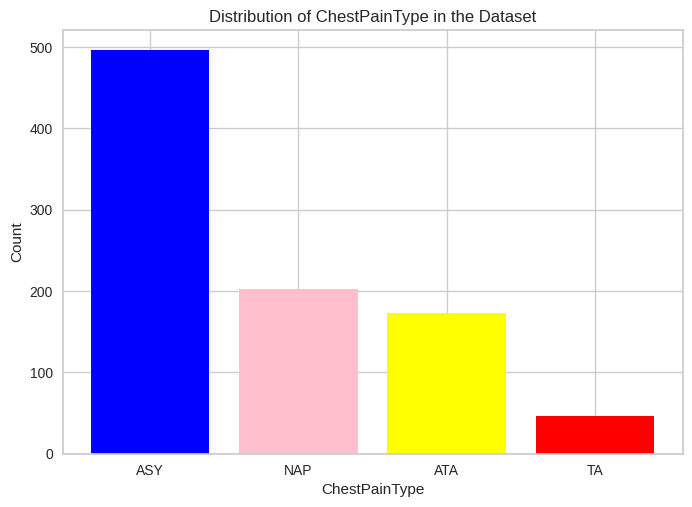

In [ ]:

counts = df['ChestPainType'].value_counts()
colors = ['blue', 'pink','yellow','red']
# Create a bar chart
plt.bar(counts.index, counts.values,color=colors)

# Set the chart title and labels
plt.title('Distribution of ChestPainType in the Dataset')
plt.xlabel('ChestPainType')
plt.ylabel('Count')

# Display the chart
plt.show()

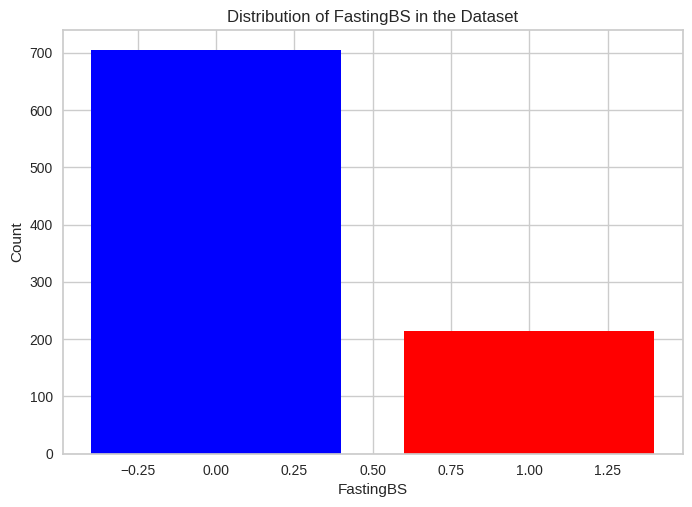

In [ ]:
counts = df['FastingBS'].value_counts()
colors = ['blue','red']
# Create a bar chart
plt.bar(counts.index, counts.values,color=colors)

# Set the chart title and labels
plt.title('Distribution of FastingBS in the Dataset')
plt.xlabel('FastingBS')
plt.ylabel('Count')

# Display the chart
plt.show()


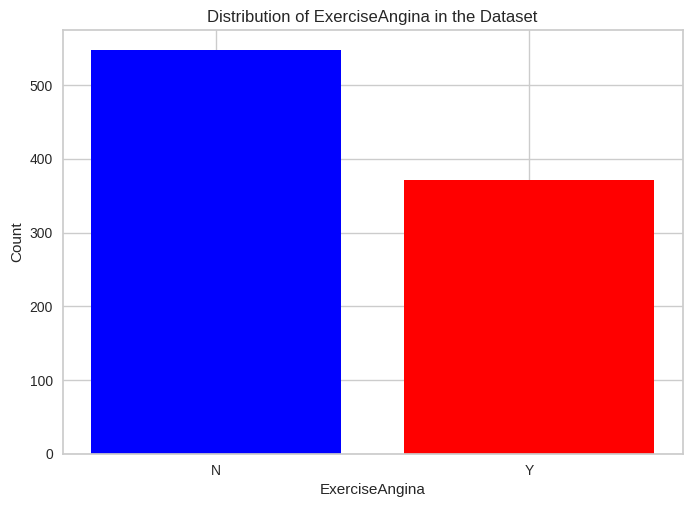

In [ ]:
counts = df['ExerciseAngina'].value_counts()
colors = ['blue','red']
# Create a bar chart
plt.bar(counts.index, counts.values,color=colors)

# Set the chart title and labels
plt.title('Distribution of ExerciseAngina in the Dataset')
plt.xlabel('ExerciseAngina')
plt.ylabel('Count')

# Display the chart
plt.show()


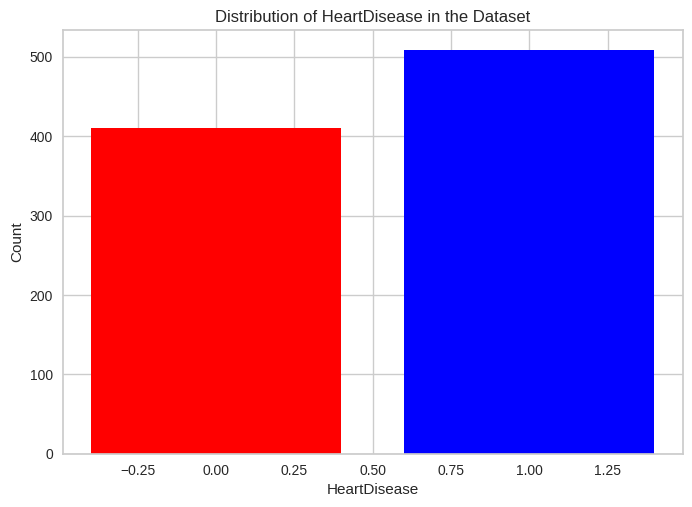

In [ ]:
counts = df['HeartDisease'].value_counts()
colors = ['blue','red']
# Create a bar chart
plt.bar(counts.index, counts.values,color=colors)

# Set the chart title and labels
plt.title('Distribution of HeartDisease in the Dataset')
plt.xlabel('HeartDisease')
plt.ylabel('Count')

# Display the chart
plt.show()


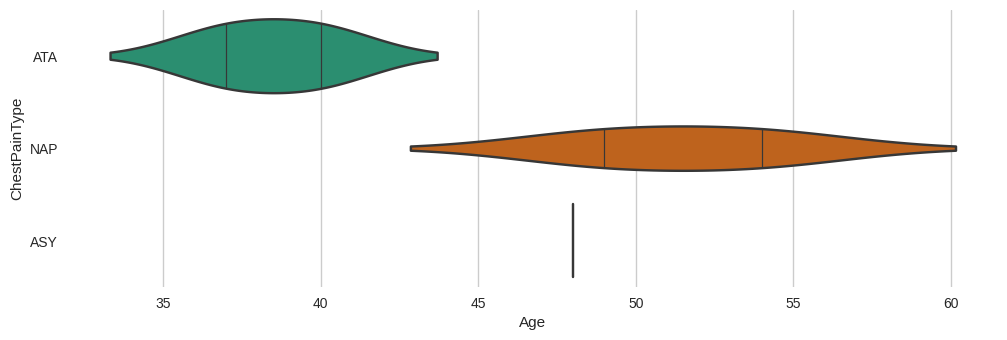

In [ ]:
# The violin plot provides insights into the distribution of the 'ChestPainType' variable across different age groups in the dataset.
figsize = (12, 1.2 * len(_df_25['ChestPainType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Age', y='ChestPainType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# for nominal variables
categorical_transformer_onehot = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False))
    ])
# for ordinal variables
categorical_transformer_ordinal = Pipeline(
    steps=[
        ("encoder", OrdinalEncoder())
    ])

num = Pipeline(
    steps=[
        ("encoder", PowerTransformer())
    ])

In [ ]:
preprocessor  = ColumnTransformer(transformers = [
                                        ('cat_onehot', categorical_transformer_onehot, [ 'Sex',  'ChestPainType', 'RestingECG', 'ST_Slope', 'ExerciseAngina']),

                                        ('num', num, ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease'])
                                        ])

In [ ]:
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor)]
    )
pipe_fit = pipeline.fit(df)

data = pd.DataFrame(pipe_fit.transform(df), columns = pipe_fit.get_feature_names_out().tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data[:7]

,cat_onehot__Sex_M,cat_onehot__ChestPainType_ATA,cat_onehot__ChestPainType_NAP,cat_onehot__ChestPainType_TA,cat_onehot__RestingECG_Normal,cat_onehot__RestingECG_ST,cat_onehot__ST_Slope_Flat,cat_onehot__ST_Slope_Up,cat_onehot__ExerciseAngina_Y,num__Age,num__RestingBP,num__Cholesterol,num__FastingBS,num__MaxHR,num__Oldpeak,num__HeartDisease
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.408156,0.407522,0.773382,-0.551341,1.407658,-0.851394,-1.113115
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.507876,1.498261,-0.033203,-0.551341,0.748173,0.286444,0.898380
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.693030,-0.134199,0.731337,-0.551341,-1.500984,-0.851394,-1.113115
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-0.611116,0.298974,0.229337,-0.551341,-1.131070,0.709738,0.898380
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.019655,0.951727,0.084078,-0.551341,-0.599786,-0.851394,-1.113115
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.504002,-0.673260,1.115483,-0.551341,1.324410,-0.851394,-1.113115
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.916133,-0.134199,0.400781,-0.551341,1.324410,-0.851394,-1.113115


In [ ]:
from pyod.models.ecod import ECOD

clf = ECOD()
clf.fit(data)
outliers = clf.predict(data)

data["outliers"] = outliers
df["outliers"] = outliers

# Data without outliers
data_no_outliers = data[data["outliers"] == 0]
data_no_outliers = data_no_outliers.drop(["outliers"], axis = 1)

# Data with Outliers
data_with_outliers = data.copy()
data_with_outliers = data_with_outliers.drop(["outliers"], axis = 1)

# Original Data without Outliers
df_no_outliers = df[df["outliers"] == 0]
df_no_outliers = df_no_outliers.drop(["outliers"], axis = 1)

In [ ]:
print(data_no_outliers.shape)
print(data_with_outliers.shape)
print(df_no_outliers.shape)

(826, 16)
(918, 16)
(826, 12)


In [ ]:
data[2:10]

,cat_onehot__Sex_M,cat_onehot__ChestPainType_ATA,cat_onehot__ChestPainType_NAP,cat_onehot__ChestPainType_TA,cat_onehot__RestingECG_Normal,cat_onehot__RestingECG_ST,cat_onehot__ST_Slope_Flat,cat_onehot__ST_Slope_Up,cat_onehot__ExerciseAngina_Y,num__Age,num__RestingBP,num__Cholesterol,num__FastingBS,num__MaxHR,num__Oldpeak,num__HeartDisease,outliers
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.693030,-0.134199,0.731337,-0.551341,-1.500984,-0.851394,-1.113115,0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-0.611116,0.298974,0.229337,-0.551341,-1.131070,0.709738,0.898380,0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.019655,0.951727,0.084078,-0.551341,-0.599786,-0.851394,-1.113115,0
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.504002,-0.673260,1.115483,-0.551341,1.324410,-0.851394,-1.113115,0
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.916133,-0.134199,0.400781,-0.551341,1.324410,-0.851394,-1.113115,0
7,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.019655,-1.209455,0.183841,-0.551341,0.183869,-0.851394,-1.113115,0
8,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-1.693030,0.407522,0.176226,-0.551341,-0.289654,0.709738,0.898380,0
9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.611116,-0.673260,0.738360,-0.551341,-0.676594,-0.851394,-1.113115,0


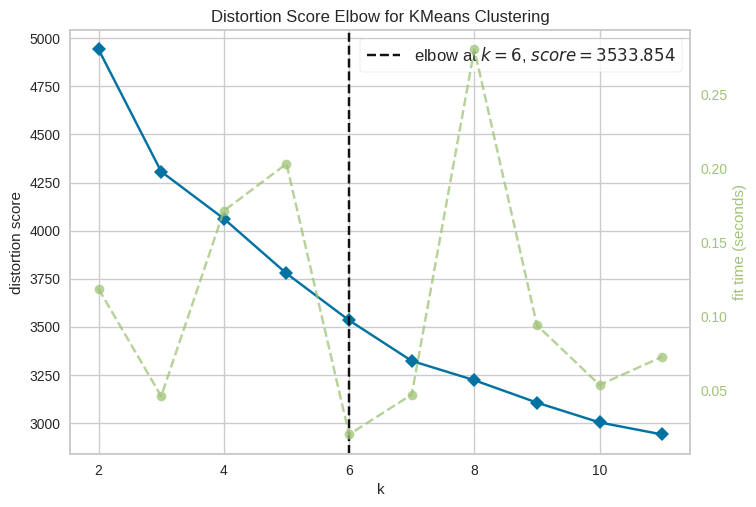

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:

# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,12))

visualizer.fit(data_no_outliers)        # Fit the data to the visualizer
visualizer.show()


In [ ]:
km = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=100, random_state=42)
clusters_predict = km.fit_predict(data_no_outliers)
print(km.inertia_)

3502.7763286323016


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

"""
The Davies Bouldin index is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.
The minimum value of the DB Index is 0, whereas a smaller value (closer to 0) represents a better model that produces better clusters.
"""
print(f"Davies bouldin score: {davies_bouldin_score(data_no_outliers,clusters_predict)}")

"""
Calinski Harabaz Index -> Variance Ratio Criterion.
Calinski Harabaz Index is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
The higher the index the more separable the clusters.
"""
print(f"Calinski Score: {calinski_harabasz_score(data_no_outliers,clusters_predict)}")


"""
The silhouette score is a metric used to calculate the goodness of fit of a clustering algorithm, but can also be used as a method for determining an optimal value of k (see here for more).
Its value ranges from -1 to 1.
A value of 0 indicates clusters are overlapping and either the data or the value of k is incorrect.
1 is the ideal value and indicates that clusters are very dense and nicely separated.
"""
print(f"Silhouette Score: {silhouette_score(data_no_outliers,clusters_predict)}")

Davies bouldin score: 1.8871961302957585
Calinski Score: 139.16040930371847
Silhouette Score: 0.17734019109882446


In [ ]:
def get_pca_2d(df, predict):

    pca_2d_object = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_2d_object.fit(df)

    df_pca_2d = pca_2d_object.transform(df)
    df_pca_2d.columns = ["comp1", "comp2"]
    df_pca_2d["cluster"] = predict

    return pca_2d_object, df_pca_2d



def get_pca_3d(df, predict):

    pca_3d_object = prince.PCA(
    n_components=3,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_3d_object.fit(df)

    df_pca_3d = pca_3d_object.transform(df)
    df_pca_3d.columns = ["comp1", "comp2", "comp3"]
    df_pca_3d["cluster"] = predict

    return pca_3d_object, df_pca_3d



def plot_pca_3d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()

    fig = px.scatter_3d(df,
                        x=columns[0],
                        y=columns[1],
                        z=columns[2],
                        color='cluster',
                        template="plotly",

                        # symbol = "cluster",

                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 4,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 1000,
                                height = 800,
                                autosize = False,
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            zaxis=dict(title = 'comp3', titlefont_color = 'black')),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))


    fig.show()


def plot_pca_2d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()


    fig = px.scatter(df,
                        x=columns[0],
                        y=columns[1],
                        color='cluster',
                        template="plotly",
                        # symbol = "cluster",

                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 8,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 800,
                                height = 700,
                                autosize = False,
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            ),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))


    fig.show()

In [ ]:
pca_3d_object, df_pca_3d = get_pca_3d(data_no_outliers, clusters_predict)

plot_pca_3d(df_pca_3d, title = "PCA Space", opacity=1, width_line = 0.1)
print("The variability is :", pca_3d_object.eigenvalues_summary)

The variability is :           eigenvalue % of variance % of variance (cumulative)
component                                                    
0              4.067        25.42%                     25.42%
1              1.605        10.03%                     35.45%
2              1.353         8.46%                     43.91%


In [ ]:
pca_2d_object, df_pca_2d = get_pca_2d(data_no_outliers, clusters_predict)
plot_pca_2d(df_pca_2d, title = "PCA Space", opacity=1, width_line = 0.5)

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,outliers
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0


In [ ]:
df_no_outliers = df[df.outliers == 0]
df_no_outliers["cluster"] = clusters_predict
df_no_outliers.groupby('cluster').agg(
    {
        'Sex': lambda x: x.value_counts().index[0],
        'ChestPainType': lambda x: x.value_counts().index[0],
        'RestingECG': lambda x: x.value_counts().index[0],
        'ExerciseAngina': lambda x: x.value_counts().index[0],
        'ST_Slope': lambda x: x.value_counts().index[0],
        'Age': 'mean',
        'RestingBP': 'mean',
        'Cholesterol': 'mean',
        'FastingBS': lambda x: x.mode().iloc[0],
        'MaxHR': 'mean',
        'Oldpeak': 'mean',
        'HeartDisease': lambda x: x.mode().iloc[0],
    }
).sort_values("Age").reset_index()

<ipython-input-68-52d0d60e54ae>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cluster,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,3,M,ATA,Normal,N,Up,44.696809,125.664894,237.063830,0,161.111702,0.156915,0
1,5,M,ASY,Normal,N,Flat,55.285714,128.800000,0.000000,1,129.528571,1.088571,1
2,1,M,ASY,Normal,Y,Flat,55.381974,134.656652,248.751073,0,127.120172,1.609013,1
3,0,M,ASY,Normal,N,Up,55.884146,132.567073,237.518293,0,136.579268,0.500000,0
4,2,M,ASY,Normal,Y,Flat,57.168831,134.246753,1.636364,0,117.532468,0.789610,1
5,4,M,ASY,Normal,Y,Flat,57.457447,138.861702,248.287234,1,132.606383,1.036170,1


#using LLM

In [ ]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra
from sentence_transformers import SentenceTransformer

In [ ]:
def compile_text(x):

    text =  f"""Age: {x['Age']},
                Sex: {x['Sex']},
                ChestPainType: {x['ChestPainType']},
                RestingECG: {x['RestingECG']},
                ExerciseAngina: {x['ExerciseAngina']},
                ST_Slope: {x['ST_Slope']},
                RestingBP: {x['RestingBP']},
                Cholesterol: {x['Cholesterol']},
                FastingBS: {x['FastingBS']},
                MaxHR: {x['MaxHR']},
                Oldpeak: {x['Oldpeak']},
                HeartDisease: {x['HeartDisease']},



            """

    return text

sentences = df.apply(lambda x: compile_text(x), axis=1).tolist()

In [ ]:
model = SentenceTransformer(r"sentence-transformers/paraphrase-MiniLM-L6-v2")
output = model.encode(sentences=sentences,
         show_progress_bar=True,
         normalize_embeddings=True)

df_embedding = pd.DataFrame(output)
df_embedding


Batches:   0%|          | 0/29 [00:00<?, ?it/s]

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.047219,0.048705,-0.018216,0.046456,-0.007849,-0.001483,-0.037098,0.050402,0.026366,-0.024789,...,0.003164,0.019245,0.003584,-0.002704,-0.000654,-0.047744,0.094422,-0.074366,-0.048209,0.106811
1,0.059899,0.081614,-0.014086,0.060952,-0.010395,-0.007374,-0.045605,0.061092,0.019173,-0.007013,...,-0.012769,0.022275,0.001310,0.003030,-0.021545,-0.044063,0.072502,-0.089398,-0.014295,0.087637
2,0.063942,0.065698,-0.035716,0.047160,-0.009080,-0.000611,-0.049093,0.037268,0.037173,-0.028357,...,-0.003445,0.021765,0.001382,-0.006900,-0.000931,-0.054470,0.092186,-0.091317,-0.030051,0.106273
3,0.070433,0.054838,-0.036846,0.048038,-0.011618,0.014415,-0.050099,0.067184,-0.006061,-0.012148,...,-0.005677,0.027387,0.000189,0.006382,-0.029392,-0.056337,0.043635,-0.073588,-0.012430,0.079897
4,0.036503,0.077187,-0.007286,0.066559,-0.020170,-0.003874,-0.046601,0.051529,0.032874,0.009401,...,0.001660,0.020380,-0.007924,-0.003019,-0.022259,-0.047002,0.078023,-0.091690,-0.035061,0.082643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.057044,0.060517,-0.012813,0.047284,-0.015729,-0.005583,-0.032966,0.045522,0.019271,-0.013792,...,-0.002536,0.033243,0.006282,0.001959,-0.038557,-0.050223,0.075501,-0.085462,-0.050451,0.087268
914,0.057647,0.050338,-0.029604,0.057026,-0.021785,0.016019,-0.048042,0.062413,0.004005,-0.016322,...,-0.002740,0.028986,0.000197,-0.005367,-0.038655,-0.047551,0.049969,-0.085451,-0.023270,0.084929
915,0.064046,0.052453,-0.034066,0.054059,-0.010195,0.011809,-0.048993,0.056141,-0.003296,-0.008675,...,-0.007569,0.035857,-0.002511,0.002448,-0.027265,-0.053827,0.046905,-0.083061,-0.027905,0.082517
916,0.065469,0.071804,-0.057084,0.034082,-0.001610,-0.011434,-0.023416,0.050168,0.022321,-0.029301,...,-0.016391,0.031982,0.005499,0.003404,-0.007336,-0.050845,0.084264,-0.080041,0.002037,0.091768


In [ ]:
from pyod.models.ecod import ECOD
# https://github.com/yzhao062/pyod

clf = ECOD()
clf.fit(df_embedding)


out = clf.predict(df_embedding)
df_embedding["outliers"] = out
df["outliers"] = out

df_embedding_no_out = df_embedding[df_embedding["outliers"] == 0]
df_embedding_no_out = df_embedding_no_out.drop(["outliers"], axis = 1)


df_embedding_with_out = df_embedding.copy()
df_embedding_with_out = df_embedding_with_out.drop(["outliers"], axis = 1)

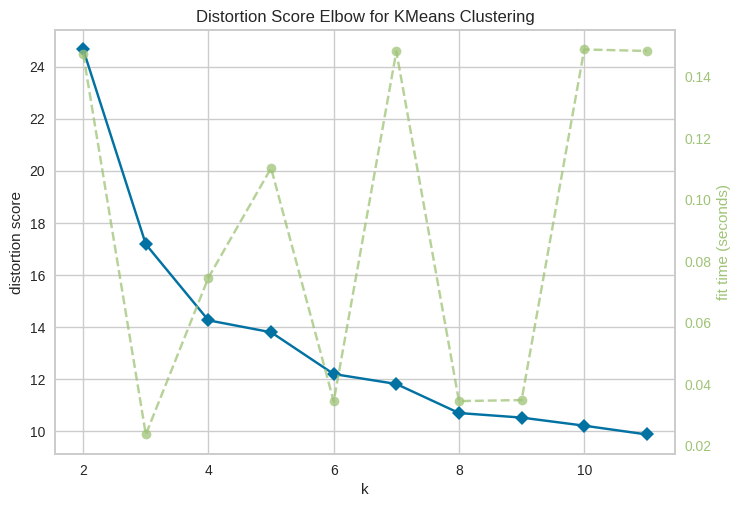

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,12), locate_elbow=False)

visualizer.fit(df_embedding_no_out)        # Fit the data to the visualizer
visualizer.show()

In [ ]:


clusters = KMeans(n_clusters=6, init = "k-means++").fit(df_embedding_no_out)
print(clusters.inertia_)
clusters_predict2 = clusters.predict(df_embedding_no_out)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


11.694482803344727


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

"""
The Davies Bouldin index is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.
The minimum value of the DB Index is 0, whereas a smaller value (closer to 0) represents a better model that produces better clusters.
"""
print(f"Davies bouldin score: {davies_bouldin_score(df_embedding_no_out,clusters_predict2)}")

"""
Calinski Harabaz Index -> Variance Ratio Criterion.
Calinski Harabaz Index is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
The higher the index the more separable the clusters.
"""
print(f"Calinski Score: {calinski_harabasz_score(df_embedding_no_out,clusters_predict2)}")


"""
The silhouette score is a metric used to calculate the goodness of fit of a clustering algorithm, but can also be used as a method for determining an optimal value of k (see here for more).
Its value ranges from -1 to 1.
A value of 0 indicates clusters are overlapping and either the data or the value of k is incorrect.
1 is the ideal value and indicates that clusters are very dense and nicely separated.
"""
print(f"Silhouette Score: {silhouette_score(df_embedding_no_out,clusters_predict2)}")

Davies bouldin score: 1.4324570792883744
Calinski Score: 252.29422714618863
Silhouette Score: 0.3221234083175659


In [ ]:


pca_3d_object, df_pca_3d = get_pca_3d(df_embedding_no_out, clusters_predict2)
plot_pca_3d(df_pca_3d, title = "PCA Space", opacity=1, width_line = 0.1)
print("The variability is :", pca_3d_object.eigenvalues_summary)



The variability is :           eigenvalue % of variance % of variance (cumulative)
component                                                    
0             87.097        22.68%                     22.68%
1             61.327        15.97%                     38.65%
2             48.877        12.73%                     51.38%


In [ ]:


pca_2d_object, df_pca_2d = get_pca_2d(df_embedding_no_out, clusters_predict2)
plot_pca_2d(df_pca_2d, title = "PCA Space", opacity=1, width_line = 0.2)



In [ ]:


df_no_outliers = df[df["outliers"] == 0]
df_no_outliers = df_no_outliers.drop("outliers", axis = 1)



In [ ]:
df_no_outliers = df[df.outliers == 0]
df_no_outliers["cluster"] = clusters_predict2
df_no_outliers.groupby('cluster').agg(
    {
        'Sex': lambda x: x.value_counts().index[0],
        'ChestPainType': lambda x: x.value_counts().index[0],
        'RestingECG': lambda x: x.value_counts().index[0],
        'ExerciseAngina': lambda x: x.value_counts().index[0],
        'ST_Slope': lambda x: x.value_counts().index[0],
        'Age': 'mean',
        'RestingBP': 'mean',
        'Cholesterol': 'mean',
        'FastingBS': lambda x: x.mode().iloc[0],
        'MaxHR': 'mean',
        'Oldpeak': 'mean',
        'HeartDisease': lambda x: x.mode().iloc[0],
    }
).sort_values("Age").reset_index()

<ipython-input-87-4521b5ec19a0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cluster,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0,M,ATA,Normal,N,Up,49.096000,129.496000,228.368000,0,150.144000,0.292800,0
1,5,M,NAP,Normal,N,Up,51.056911,128.837398,200.780488,0,144.959350,0.557724,0
2,1,M,ASY,Normal,Y,Flat,53.366197,131.732394,174.957746,0,127.890845,1.081690,1
3,2,M,NAP,LVH,N,Flat,56.730337,135.685393,185.213483,0,140.573034,0.922472,0
4,3,M,ASY,LVH,Y,Flat,56.875000,133.854167,240.020833,0,136.031250,1.270833,1
5,4,M,ASY,ST,Y,Flat,57.743119,136.082569,166.431193,0,122.981651,1.238532,1
